In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
import pickle
import matplotlib.pyplot as plt

# Loading data
file_path = "train.dat"
columns = [
    "frequency", 
    "attack_angle", 
    "chord_length", 
    "free_stream_velocity", 
    "suction_side_displacement_thickness", 
    "scaled_sound_pressure"
]
data = pd.read_csv(file_path, sep="\t", header=None, names=columns)

In [2]:

# Step: 1 Features and target values
##############################################
X = data[["frequency", "attack_angle", "chord_length", "free_stream_velocity", "suction_side_displacement_thickness"]]
y = data["scaled_sound_pressure"]
##############################################

In [3]:
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2)

In [4]:
# Step: 3 Normalizing features
##############################################
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
##############################################

In [5]:
# Converting to tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)
X_val = torch.tensor(X_val, dtype=torch.float32)
y_val = torch.tensor(y_val.values, dtype=torch.float32).unsqueeze(1)


In [6]:
class LinearRegressionModel(nn.Module):
    #change this
    def __init__(self,num_features):
        super().__init__()

        self.model = nn.Sequential(
            nn.Linear(num_features,10),
            nn.ReLU(),
            nn.Linear(10,1),
            nn.ReLU()
        )
    
    def forward(self,X):
        return self.model(X)

In [7]:
model = LinearRegressionModel(X_train.shape[1])
lr = 0.06
loss_function = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=lr)

batch_size = 32

In [8]:
epochs = 300

train_dataset = torch.utils.data.TensorDataset(X_train, y_train)
val_dataset = torch.utils.data.TensorDataset(X_val, y_val)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size)


In [15]:
train_loss = []
val_loss = []
for i in range(epochs): # Total training epoch is 10000
    
    outputs = model(X_train)

    loss = loss_function(outputs.squeeze(),y_train)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()
    print(f'Epoch: {i + 1} ,Train Loss: {loss.item()}')
    train_loss.append(loss.item()) # Log the training loss for the epoch

    with torch.no_grad():
        val_out = model(X_val)
        val_l = loss_function(val_out.squeeze(),y_val)
        print(f'Val Loss:{val_l}')
        val_loss.append(val_l)

/Users/kash/miniconda/envs/ail721/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([841, 1])) that is different to the input size (torch.Size([841])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/Users/kash/miniconda/envs/ail721/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([211, 1])) that is different to the input size (torch.Size([211])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch: 1 ,Train Loss: 55.687015533447266
Val Loss:59.66648864746094
Epoch: 2 ,Train Loss: 55.58494567871094
Val Loss:59.554447174072266
Epoch: 3 ,Train Loss: 55.48463439941406
Val Loss:59.44186019897461
Epoch: 4 ,Train Loss: 55.38618850708008
Val Loss:59.32975387573242
Epoch: 5 ,Train Loss: 55.289093017578125
Val Loss:59.219512939453125
Epoch: 6 ,Train Loss: 55.19280242919922
Val Loss:59.11051940917969
Epoch: 7 ,Train Loss: 55.09775161743164
Val Loss:59.003173828125
Epoch: 8 ,Train Loss: 55.004295349121094
Val Loss:58.89686965942383
Epoch: 9 ,Train Loss: 54.91208267211914
Val Loss:58.79205322265625
Epoch: 10 ,Train Loss: 54.821109771728516
Val Loss:58.68904495239258
Epoch: 11 ,Train Loss: 54.7313346862793
Val Loss:58.58850860595703
Epoch: 12 ,Train Loss: 54.64283752441406
Val Loss:58.49108123779297
Epoch: 13 ,Train Loss: 54.55556106567383
Val Loss:58.39509582519531
Epoch: 14 ,Train Loss: 54.469581604003906
Val Loss:58.30064392089844
Epoch: 15 ,Train Loss: 54.38477325439453
Val Loss:58.

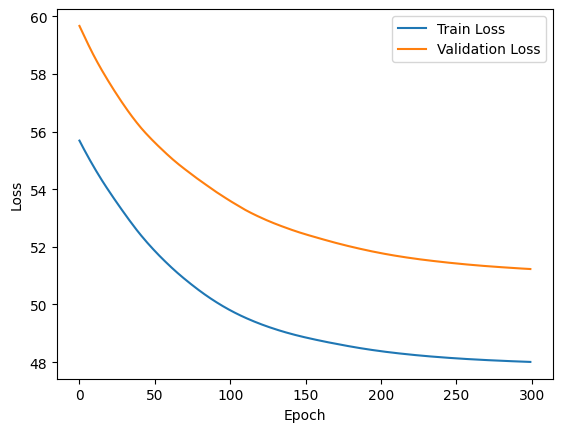

In [18]:
plt.xlabel("Epoch")
plt.ylabel('Loss')
plt.plot(train_loss)
plt.plot(val_loss)
plt.legend(['Train Loss','Validation Loss'])
plt.savefig(f"./loss.png")

In [12]:
torch.save(model,'./2024AIB2289_model.pkl')